In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
df = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
weather = pd.read_csv('weather.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [6]:
spray

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [8]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


# Cleaning Weather Dataset:

For the columns which denote precipitation, there are two values we should replace. M denotes "Missing Data" which we should replace with NaN so that it does not interfere with our ability to perform numerical analysis on these columns. T denotes "Trace" which indicates that the value is greater than zero but less than the smallest unit of measurement (0.1 inches for Snowfall and 0.01 inches for rain). We will replace "T" with a value equal to half of that smallest unit (i.e. 0.05 inches for Snowfall and 0.005 inches for rain).

In [9]:
weather = weather.replace('M',np.nan)
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,NaN,34,42,20,0,...,,NaN,NaN,NaN,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,NaN,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,NaN,35,42,20,0,...,RA,NaN,NaN,NaN,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,NaN,0.1,0.03,29.49,30.20,22.6,34,22.9


In [10]:
weather.Water1.value_counts()

Series([], Name: Water1, dtype: int64)

In [11]:
weather.Depth.value_counts()

0    1472
Name: Depth, dtype: int64

Both the Depth (represents Snow/Ice on ground per QDCD documentation) and the Water Equivalent (connected to this Snow/Ice value) columns are essentially empty with no useful data. We should delete both of them now to slim down our features.

In [12]:
weather = weather.drop(columns=['Depth','Water1'])

In [13]:
weather['SnowFall'] = weather['SnowFall'].replace('  T',0.05)
weather['PrecipTotal'] = weather['PrecipTotal'].replace('  T',0.005)

In [14]:
weather['PrecipTotal'].value_counts()

0.00     1577
0.005     318
0.01      127
0.02       63
0.03       46
         ... 
2.43        1
1.24        1
3.31        1
1.57        1
1.73        1
Name: PrecipTotal, Length: 167, dtype: int64

Now let's convert all of the numerical features into Float datatypes.

In [15]:
weather['AvgSpeed'] = weather['AvgSpeed'].astype('float64')
weather['SeaLevel'] = weather['SeaLevel'].astype('float64')
weather['StnPressure'] = weather['StnPressure'].astype('float64')
weather['PrecipTotal'] = weather['PrecipTotal'].astype('float64')
weather['ResultSpeed'] = weather['ResultSpeed'].astype('float64')
weather['SnowFall'] = weather['SnowFall'].astype('float64')
weather['Tmax'] = weather['Tmax'].astype('float64')
weather['Tmin'] = weather['Tmin'].astype('float64')
weather['Tavg'] = weather['Tavg'].astype('float64')
weather['Depart'] = weather['Depart'].astype('float64')
weather['DewPoint'] = weather['DewPoint'].astype('float64')
weather['WetBulb'] = weather['WetBulb'].astype('float64')
weather['Heat'] = weather['Heat'].astype('float64')
weather['Cool'] = weather['Cool'].astype('float64')

For sunrise and sunset columns, these are actually timevalue data types. Let's convert them accordingly.

In [16]:
weather['Sunrise'] = weather['Sunrise'].replace('-',np.NaN)
weather['Sunset'] = weather['Sunset'].replace('-',np.NaN)
for i in range(len(weather)):
    try:
        weather['Sunrise'][i] = datetime.strptime(weather['Sunrise'][i],'%H%M').time()
    except:
        pass
    try:
        weather['Sunset'][i] = datetime.strptime(weather['Sunset'][i],'%H%M').time()
    except:
        pass

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Now to deal with "CodeSum", we need to one hot encode this column for each of the types of weather conditions in the dataset. We can do that using the MultiLabelBinarizer from sklearn.

In [17]:
weather['CodeSumSplit'] = weather['CodeSum'].str.split(' ')
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(weather['CodeSumSplit']),
                   columns=mlb.classes_)

#The first column is a duplicate since it represents any row which has no weather conditions at all. Let's remove it and add in the rest to our weather dataframe.
for i in range(1,17):
    weather[res.columns[i]] = res.iloc[:,i]
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,1,2007-05-01,83.0,50.0,67.0,14.0,51.0,56.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,84.0,52.0,68.0,NaN,51.0,57.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,59.0,42.0,51.0,-3.0,42.0,47.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2,2007-05-02,60.0,43.0,52.0,NaN,42.0,47.0,13.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1,2007-05-03,66.0,46.0,56.0,2.0,40.0,48.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49.0,40.0,45.0,NaN,34.0,42.0,20.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2940,1,2014-10-30,51.0,32.0,42.0,-4.0,34.0,40.0,23.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2941,2,2014-10-30,53.0,37.0,45.0,NaN,35.0,42.0,20.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2942,1,2014-10-31,47.0,33.0,40.0,-6.0,25.0,33.0,25.0,0.0,...,0,0,0,1,1,0,0,0,0,0


Finally, let's go ahead and convert the Date column to a "Datetime" format so that we can make sure it will join properly with our other datasets in later steps.

In [18]:
for i in range(len(weather['Date'])):
    try:
        weather['Date'][i] = pd.to_datetime(weather['Date'][i]).date()
    except:
        pass

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Let's merge the two station data into one using the following methodology:
    1. If there are any null values in one station dataset and not the other, then the merged version will use whatever is   
    available.
    2. All numerical values will be averaged.
    3. For the weather condition categories, we will include every observed value between the two stations (e.g. If Station 
    1 recorded "BR" for and Station 2 recorded "BR HZ", then the merged row's "CodeSum" will have "BR HZ")

In [19]:
station1 = weather.iloc[::2]
station2 = weather.iloc[1::2]

In [20]:
station1['CodeSum'].value_counts()

                        805
RA                      161
RA BR                   128
BR                       66
TSRA RA BR               48
                       ... 
TSRA RA BR VCTS           1
TSRA RA FG+ FG BR HZ      1
TS BR HZ                  1
RA SN                     1
RA DZ FG+ FG BR           1
Name: CodeSum, Length: 67, dtype: int64

In [21]:
station1.SnowFall.value_counts()

0.00    1459
0.05      12
0.10       1
Name: SnowFall, dtype: int64

In [22]:
station_m = station1.fillna(station2)

In [23]:
for i in range(2,21):
    for j in range(len(station1)):
        try:
            merged_value = statistics.mean([station1.iloc[j,i],station2.iloc[j,i]])
            if np.isnan(merged_value):
                pass
            else:
                station_m.iloc[j,i] = merged_value
        except:
            pass
for i in range(21,37):
    for j in range(len(station1)):
        if station1.iloc[j,i] == 1:
            station_m.iloc[j,i] = 1
        elif station2.iloc[j,i] == 1:
            station_m.iloc[j,i] = 1
        else:
            station_m.iloc[j,i] = 0
station_m.drop(columns='Station',inplace=True)
station_m.reset_index(drop=True,inplace=True)

In [24]:
station_m

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,04:48:00,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,04:47:00,...,0,1,0,0,0,0,0,0,0,0
2,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,04:46:00,...,0,1,0,0,0,0,0,0,0,0
3,2007-05-04,72.0,50.0,58.0,4.0,41.5,50.0,7.0,0.0,04:44:00,...,0,0,0,1,0,0,0,0,0,0
4,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,04:43:00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,78.0,52.5,65.5,16.0,51.5,58.5,0.5,1.0,06:18:00,...,0,0,0,1,0,0,0,0,0,0
1468,2014-10-28,67.0,46.5,57.0,10.0,39.0,47.5,8.0,0.0,06:19:00,...,0,0,0,1,0,0,0,0,0,0
1469,2014-10-29,49.0,38.0,44.0,-4.0,33.0,41.0,21.0,0.0,06:20:00,...,0,0,0,0,0,0,0,0,0,0
1470,2014-10-30,52.0,34.5,43.5,-4.0,34.5,41.0,21.5,0.0,06:22:00,...,0,0,0,1,0,0,0,0,0,0


# Cleaning Spraying Dataset:

In [25]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [26]:
spray[spray['Time'].isna()]['Date'].value_counts()

2011-09-07    584
Name: Date, dtype: int64

Interesting. It seems like all of the missing timestamps are from September 7, 2011. 

In [27]:
for i in range(len(spray['Time'])):
    try:
        spray['Time'][i] = pd.to_datetime(spray['Time'][i]).time().strftime('%H:%M:%S')
        spray['Date'][i] = pd.to_datetime(spray['Date'][i]).date()
    except:
        pass
spray

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Time,Latitude,Longitude
0,2011-08-29,18:56:58,42.391623,-88.089163
1,2011-08-29,18:57:08,42.391348,-88.089163
2,2011-08-29,18:57:18,42.391022,-88.089157
3,2011-08-29,18:57:28,42.390637,-88.089158
4,2011-08-29,18:57:38,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,20:34:11,42.006587,-87.812355
14831,2013-09-05,20:35:01,42.006192,-87.816015
14832,2013-09-05,20:35:21,42.006022,-87.817392
14833,2013-09-05,20:35:31,42.005453,-87.817423


# Mosquito Trap Dataset:

In [28]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [30]:
#Convert Date column into DateTime object.
for i in range(len(df['Date'])):
    try:
        df['Date'][i] = pd.to_datetime(df['Date'][i]).date()
    except:
        pass

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
df_m = pd.merge(df,station_m,how='left',on='Date')
df_m2 = pd.merge(df_m,spray,how='left',left_on=['Date','Latitude','Longitude'],right_on=['Date','Latitude','Longitude'])

It seems like if we use the Latitude and Longitude coordinates as is, the decimal places are too precise and there are actually no matching columns. Let's see if we can maybe get some better results by curtailing some of the coordinates.

In [32]:
spray2 = spray.copy()
df_m2 = df_m.copy()
spray2['Latitude'] = spray2['Latitude'].round(4)
df_m2['Latitude'] = df_m2['Latitude'].round(4)
spray2['Longitude'] = spray2['Longitude'].round(4)
df_m2['Longitude'] = df_m2['Longitude'].round(4)

In [48]:
df_final = pd.merge(df_m2,spray2,how='left',on=['Latitude','Longitude'])
df_final.rename(columns={'Date_x':'Date'},inplace=True)
df_final['Date'] = pd.to_datetime(df_final['Date'],errors='coerce')
df_final.drop(columns=['Date_y'],inplace=True)
df_final

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS,Time
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.9547,-87.8010,9,...,1,0,0,0,0,0,0,0,0,NaN
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.9547,-87.8010,9,...,1,0,0,0,0,0,0,0,0,NaN
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.9950,-87.7693,9,...,1,0,0,0,0,0,0,0,0,NaN
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.9741,-87.8248,8,...,1,0,0,0,0,0,0,0,0,NaN
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.9741,-87.8248,8,...,1,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.7637,-87.7423,8,...,0,0,0,0,0,0,0,0,0,NaN
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.9873,-87.6661,8,...,0,0,0,0,0,0,0,0,0,NaN
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.9126,-87.6681,9,...,0,0,0,0,0,0,0,0,0,NaN
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.0099,-87.8073,9,...,0,0,0,0,0,0,0,0,0,NaN


In [50]:
#Let's save this Dataframe now so we can refer to it in our next notebook in which we'll begin the feature engineering part of this project.
df_final.to_csv('WnvDataframe',index=False)
geo_df.to_csv('WnvGeoDataframe',index=False)

We will revisit this dataframe to add more features once we enter the preprocessing stage. For now, let's try to perform some exploratory data analysis to see if we can find some insights before we try building out a model.

# Exploratory Data Analysis:

# Correlation Heat Map

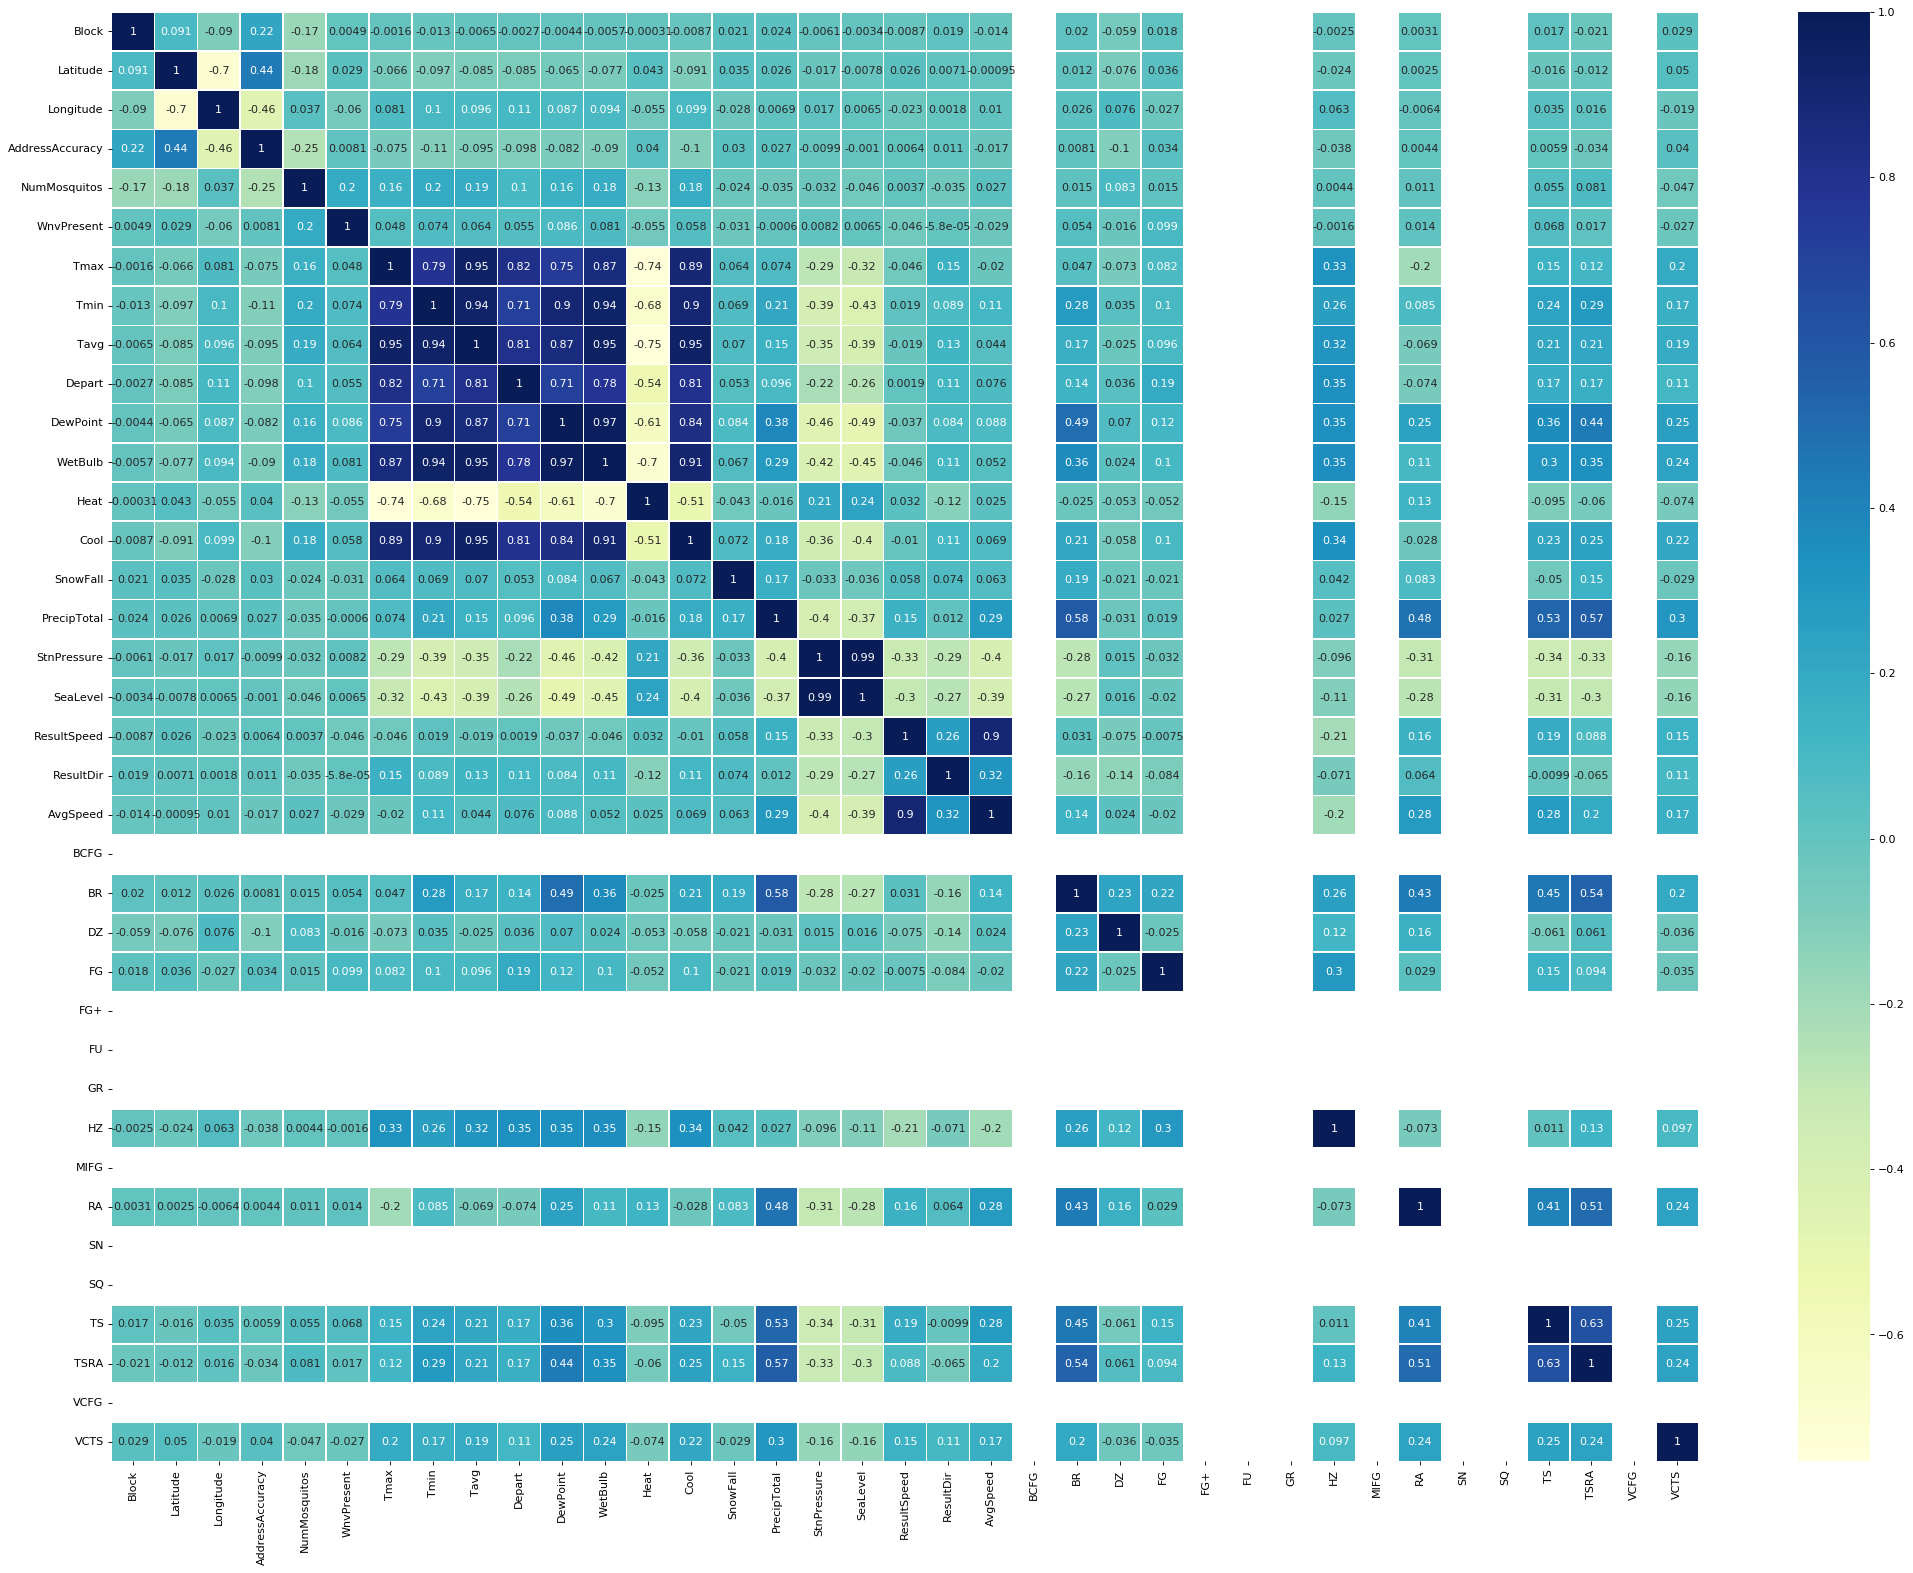

In [34]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

corr = df_final.corr()
figure(figsize=(32,24), dpi=80)
ax = sns.heatmap(corr,xticklabels = corr.columns,yticklabels=corr.columns,annot=True, cmap = "YlGnBu",linewidth=0.5)
plt.show();

In [35]:
corr.sort_values(by='WnvPresent')

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,...,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCFG,VCTS
Longitude,-0.090339,-0.701833,1.000000,-0.456749,0.036611,-0.060349,0.081052,0.101176,0.095625,0.105599,...,NaN,0.062645,NaN,-0.006372,NaN,NaN,0.035065,0.015518,NaN,-0.019089
Heat,-0.000306,0.043302,-0.054649,0.040193,-0.130254,-0.054740,-0.740174,-0.681273,-0.753615,-0.543009,...,NaN,-0.149090,NaN,0.130359,NaN,NaN,-0.095033,-0.059909,NaN,-0.073753
ResultSpeed,-0.008738,0.026242,-0.022877,0.006394,0.003658,-0.046298,-0.046229,0.018924,-0.019379,0.001900,...,NaN,-0.209691,NaN,0.157062,NaN,NaN,0.190544,0.088023,NaN,0.145787
SnowFall,0.021321,0.035095,-0.027922,0.029506,-0.024226,-0.030886,0.063815,0.069431,0.070363,0.052788,...,NaN,0.041815,NaN,0.082788,NaN,NaN,-0.049830,0.147795,NaN,-0.029470
AvgSpeed,-0.013700,-0.000949,0.010072,-0.016852,0.026686,-0.029416,-0.019974,0.114007,0.044052,0.075801,...,NaN,-0.203178,NaN,0.283218,NaN,NaN,0.283833,0.196864,NaN,0.170443
VCTS,0.029122,0.049668,-0.019089,0.039533,-0.046523,-0.026838,0.195351,0.166027,0.191611,0.110138,...,NaN,0.096835,NaN,0.240072,NaN,NaN,0.250415,0.243319,NaN,1.000000
DZ,-0.059276,-0.076221,0.076032,-0.100033,0.082877,-0.015834,-0.072966,0.035098,-0.025178,0.036194,...,NaN,0.119608,NaN,0.160553,NaN,NaN,-0.060821,0.061154,NaN,-0.035970
HZ,-0.002497,-0.023542,0.062645,-0.037752,0.004423,-0.001634,0.331568,0.263419,0.315458,0.346041,...,NaN,1.000000,NaN,-0.073411,NaN,NaN,0.011055,0.132765,NaN,0.096835
PrecipTotal,0.024445,0.026437,0.006889,0.027265,-0.034829,-0.000596,0.074105,0.207586,0.145680,0.096498,...,NaN,0.026682,NaN,0.476794,NaN,NaN,0.533476,0.565558,NaN,0.302725
ResultDir,0.018525,0.007057,0.001774,0.011442,-0.035467,-0.000058,0.152537,0.088611,0.128372,0.113352,...,NaN,-0.070800,NaN,0.064280,NaN,NaN,-0.009900,-0.065263,NaN,0.106092


# Observation 1: At a glance it doesn't seem like there are any notable correlations we can point out except for some variables we already know are inherently connected like Dewpoint & WetBulb or Temperature vs Heat/Cool. The highest correlation any feature has with the presence of WNV is "Number of Mosquitos in the Trap" at 0.19 which makes logical sense.

In [36]:
df_agg = df_final.groupby('Date').sum() #This df_agg dataframe allows us to view the data and the trends it demonstrates from day to day.
date_count= []
for count in df_final.groupby('Date').count()['WnvPresent']:
    date_count.append(count)
trap_ratio = []
mosquito_ratio = []
for i in range(len(df_agg['WnvPresent'])):
    trap_ratio.append(df_agg['WnvPresent'][i]/date_count[i])
    mosquito_ratio.append(df_agg['WnvPresent'][i]/df_agg['NumMosquitos'][i])
df_agg['WnvRatio'] = trap_ratio #This new WnvRatio column is a created feature which is equal to the total number of positive tests divided by the total number of traps for each day in the dataset.
df_agg['WnvRatioMosquito'] = mosquito_ratio #This is also a WnvRatio but divided by the total number of mosquitos instead of total number of traps.

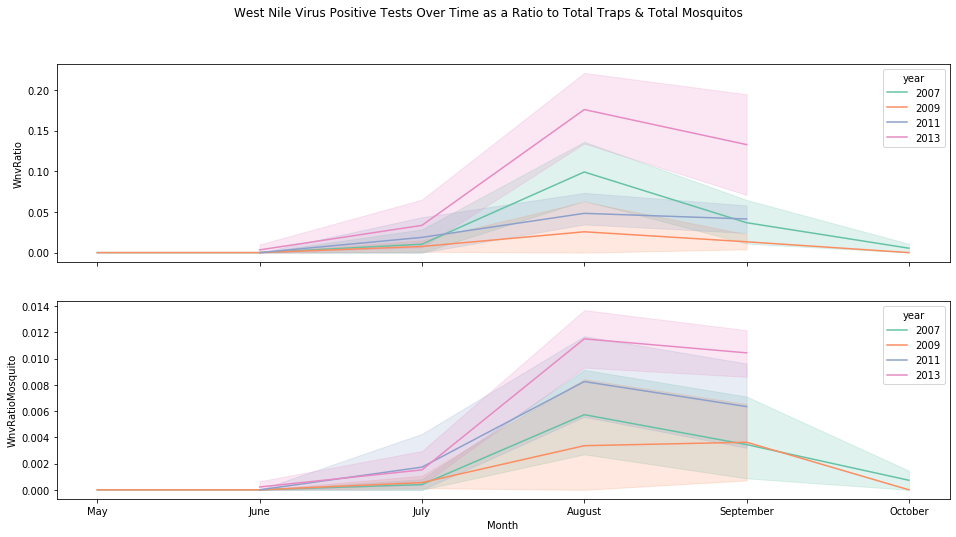

In [37]:
from calendar import month_name as mn

f,axes = plt.subplots(2,1,figsize=(16,8),sharex=True)
plt.suptitle('West Nile Virus Positive Tests Over Time as a Ratio to Total Traps & Total Mosquitos')
plt.xticks(ticks=[5,6,7,8,9,10],labels=['May','June','July','August','September','October'])
plt.xlabel('Month')
months = []
years = []
for date in df_agg.index:
    months.append(date.month)
    years.append(date.year)
df_agg['month'] = months
df_agg['year'] = years
sns.lineplot(x='month',y='WnvRatio',hue='year',palette='Set2',data=df_agg,ax=axes[0])
sns.lineplot(x='month',y='WnvRatioMosquito',hue='year',palette='Set2',data=df_agg,ax=axes[1])
plt.show();

# Observations 1 & 2: The Peak Month for WestNileVirus is in August. The Virus appeared to have dipped between 2007 to 2009 but is now back on the rise since, increasing from 2009 to 2011 and then again from 2011 to 2013.

In [38]:
df_b = df_agg.iloc[:,np.r_[5,21:37]]
virus = []
for i in range(len(df_b)):
    if df_b['WnvPresent'][i] > 0:
        virus.append('Virus Present')
    else:
        virus.append('Virus Not Present')
df_b['WnvStatus'] = virus
df_c = df_b.groupby('WnvStatus').head()
for i in range(len(df_c.columns[1:])):
    for j in range(len(df_c)):
        if df_c.iloc[j,i] > 0:
            df_c.iloc[j,i] = 1
        else:
            pass

C:\Users\Smartjuice\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Smartjuice\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


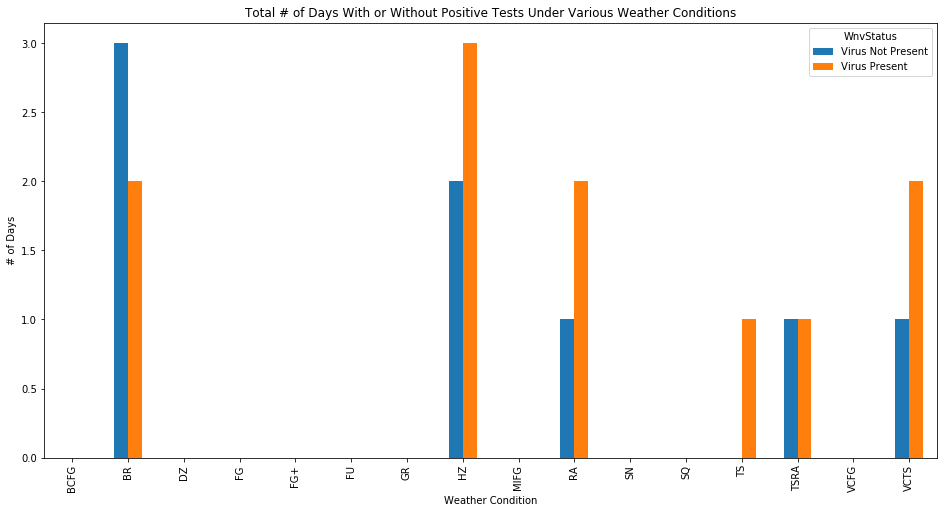

In [39]:
plt.rcParams["figure.figsize"] = (16,8)
df_c.groupby('WnvStatus').sum().iloc[:,1:].T.plot.bar()
plt.xlabel('Weather Condition')
plt.ylabel('# of Days')
plt.title('Total # of Days With or Without Positive Tests Under Various Weather Conditions')
plt.show();

# Observation 3: Hazy Days, Rainy Days, & Thunderstorm Days each had more instances of positive tests than negative ones.

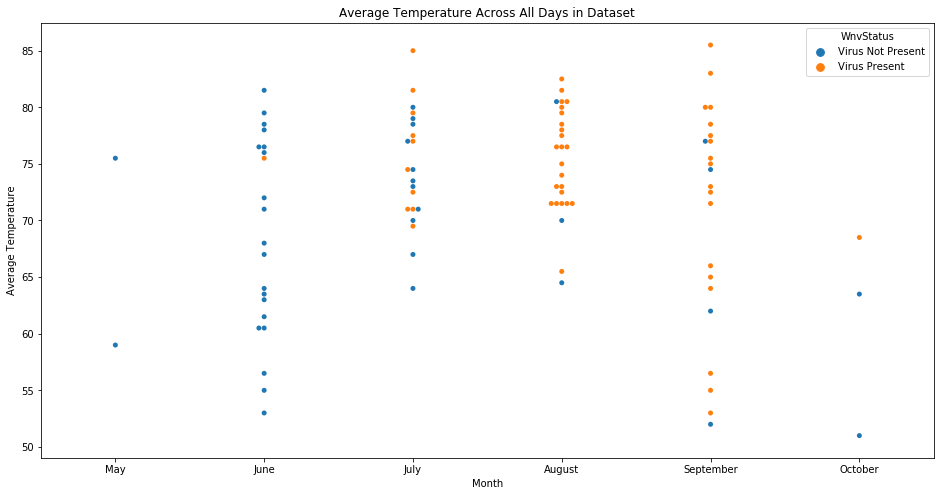

In [40]:
df_mean = df_final.groupby('Date').mean()
df_mean['month'] = months
df_mean['year'] = years
df_mean['WnvStatus'] = virus
swarmplot = sns.swarmplot(x='month',y='Tavg',hue='WnvStatus',data=df_mean)
plt.title('Average Temperature Across All Days in Dataset')
plt.ylabel('Average Temperature')
plt.xlabel('Month')
swarmplot.set_xticklabels(['May','June','July','August','September','October'])
plt.show();

# Observation 4: There appears to be a general trend for the virus to show up on hotter days than colder.

C:\Users\Smartjuice\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


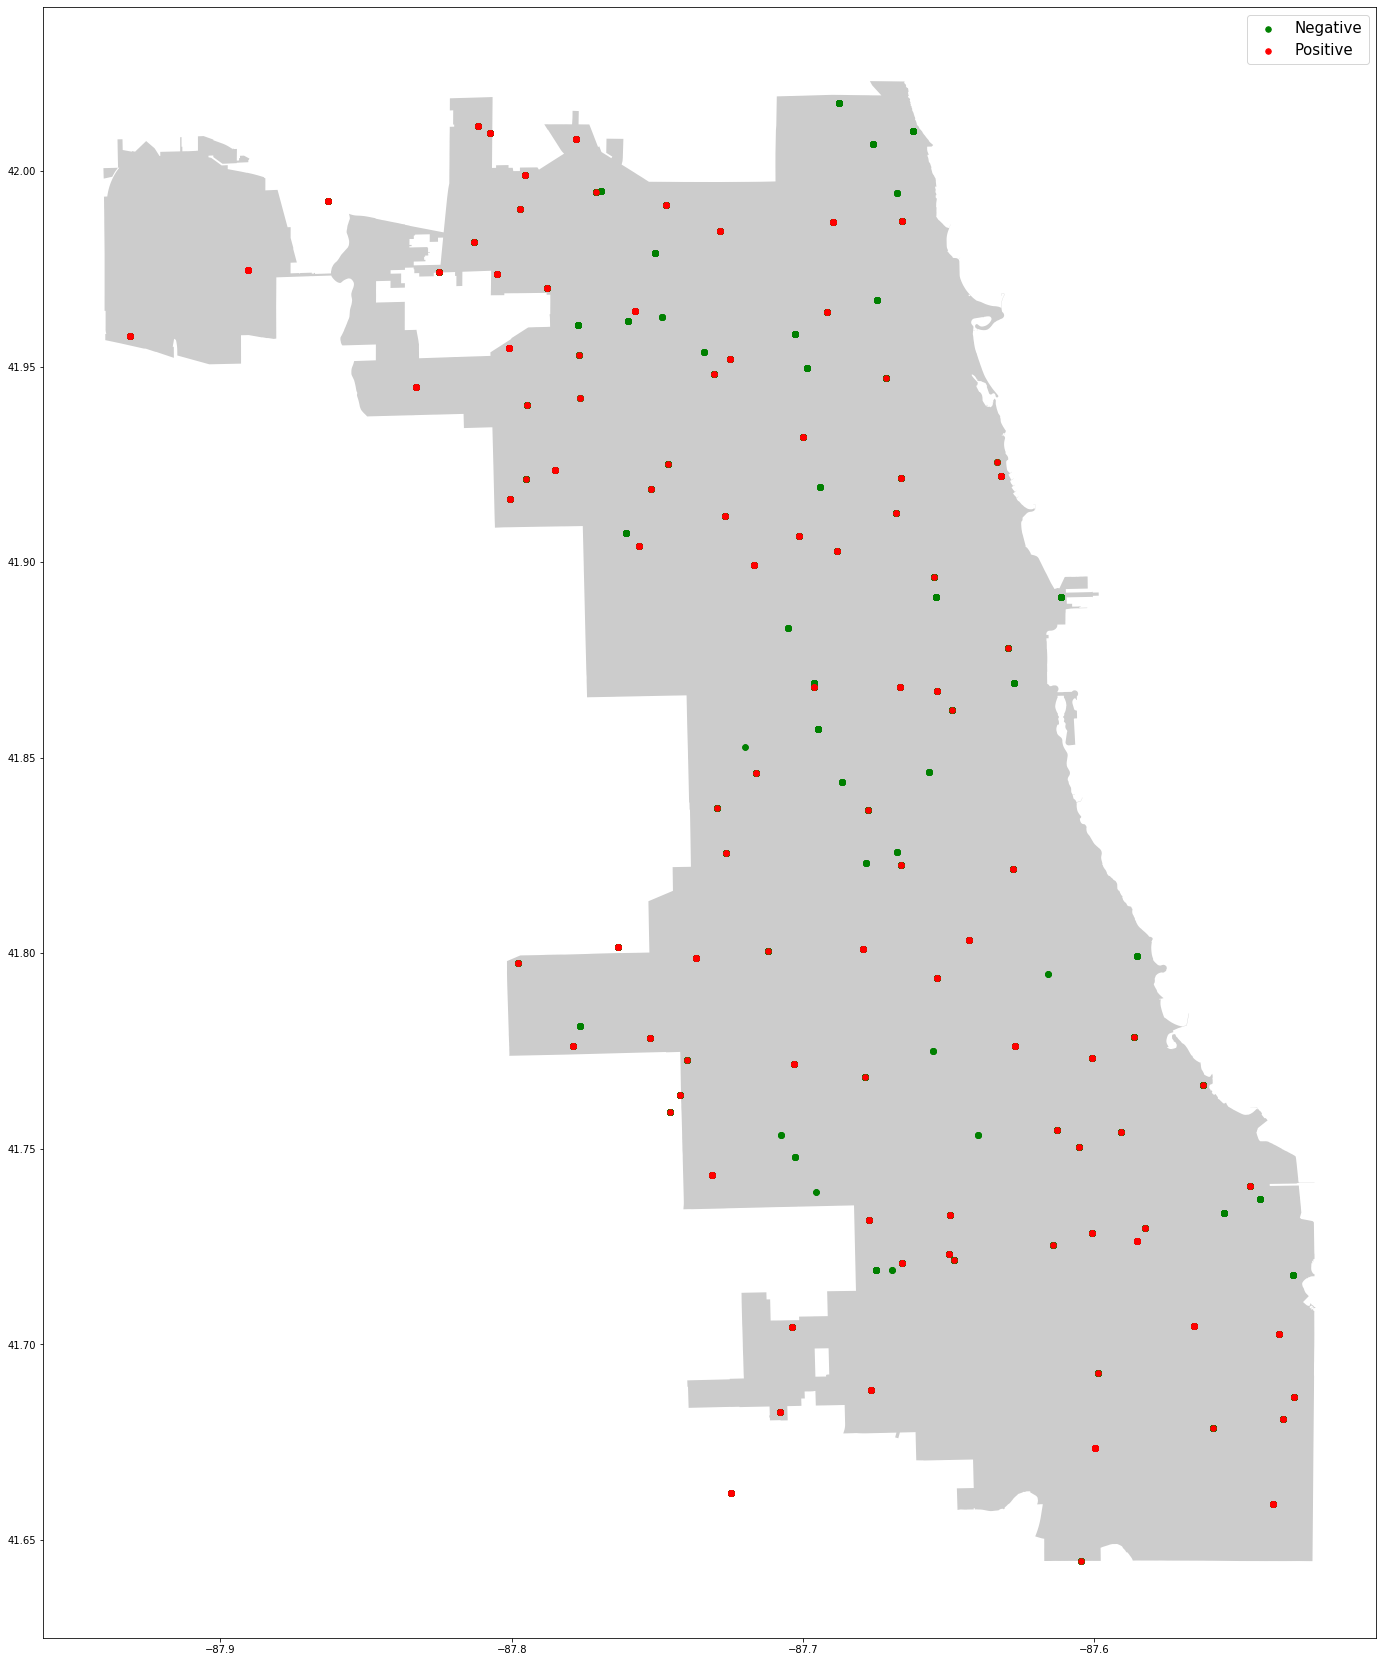

In [41]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
chicago_map = gpd.read_file('chicago_geodata/geo_export_55fcb48c-7621-4c8a-999c-9fb3c86e8950.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_final['Longitude'],df_final['Latitude'])]
geo_df = gpd.GeoDataFrame(df_final,crs=crs,geometry=geometry)
fig,ax = plt.subplots(figsize=(30,30))
chicago_map.plot(ax=ax,alpha=0.4,color='grey')
geo_df[geo_df['WnvPresent']==0].plot(ax=ax,markersize=30,color='green',label = 'Negative')
geo_df[geo_df['WnvPresent']==1].plot(ax=ax,markersize=30,color='red',label = 'Positive')
plt.legend(prop={'size':15});

# Observation 5: Southeast Chicago & Northwest Chicago appear to be hotspots for the virus. Notably, Northwest Chicago is where O'Hare International Airport is.